<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('china_gdp.csv')
# Prepare data
x = df["Year"].values
y = df["Value"].values

In [3]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
# Define logistic function
def logistic(x, L, x0, k):
    return L / (1 + np.exp(-k * (x - x0)))

# Fit logistic curve
popt, _ = curve_fit(logistic, x, y, p0=[1e13, 1990, 0.03])

# Predict GDP values
y_pred = logistic(x, *popt)

# Calculate R² score
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9938


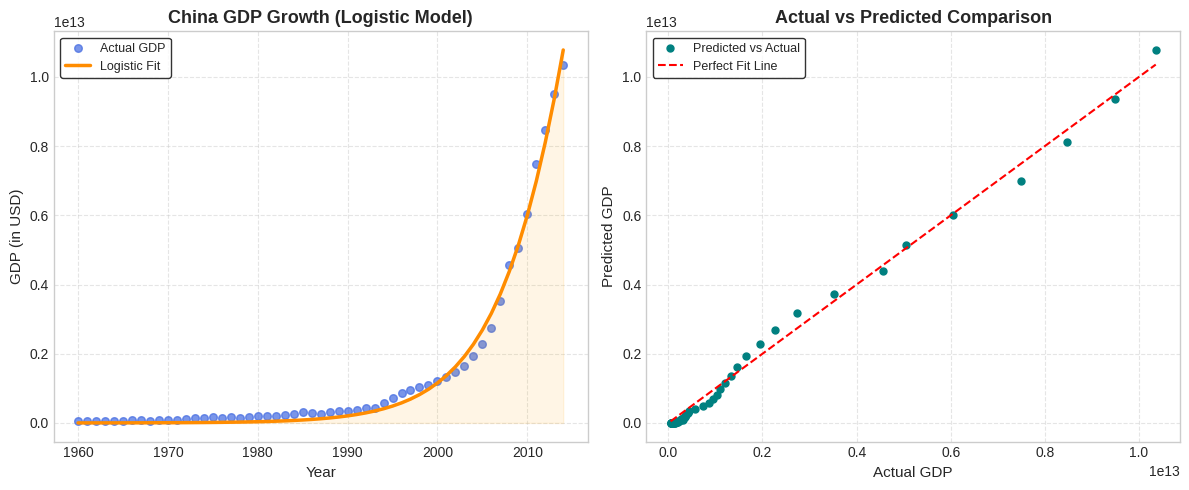

In [5]:

# Visualization
plt.figure(figsize=(12, 5))
plt.style.use('seaborn-v0_8-whitegrid')

# Left plot — GDP Growth curve
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='royalblue', s=30, label='Actual GDP', alpha=0.7)
plt.plot(x, y_pred, color='darkorange', linewidth=2.5, label='Logistic Fit')
plt.fill_between(x, y_pred, color='orange', alpha=0.1)
plt.xlabel("Year", fontsize=11)
plt.ylabel("GDP (in USD)", fontsize=11)
plt.title("China GDP Growth (Logistic Model)", fontsize=13, fontweight='bold')
plt.legend(frameon=True, edgecolor='black', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)

# Right plot — Actual vs Predicted GDP
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, color='teal', s=25, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=1.5, label='Perfect Fit Line')
plt.xlabel("Actual GDP", fontsize=11)
plt.ylabel("Predicted GDP", fontsize=11)
plt.title("Actual vs Predicted Comparison", fontsize=13, fontweight='bold')
plt.legend(frameon=True, edgecolor='black', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()